# INTERNSHIP PROJECT - COGNIFYZ TECHNOLOGIES <hr>
# RESTAURANTS ANALYSIS<hr>
# LEVEL- 3<hr>


# Task-1  Restaurant Ratings

# <hr>Problem Statement : 

## Objective: 
## 1. Analyze the text reviews to identify the most common positive and negative keywords.
## 2. Calculate the average length of reviews and explore if there is a relationship between
## review length and rating.

## Overview
###  <hr>The goal of this project is to conduct a comprehensive analysis of restaurant data to extract valuable insights. This includes identifying common keywords in reviews, understanding review patterns, and exploring various factors affecting restaurant ratings and popularity. <hr>

# IMPORT LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# LOAD DATASET

In [2]:
df=pd.read_csv('Restaurent_data.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Solve Problem - 1

In [7]:
# Initialize NLTK tools
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


In [18]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Preprocess the reviews
def preprocess_review(review):
    tokens = word_tokenize(str(review).lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

df['Cleaned_Reviews'] = df['Rating text'].apply(preprocess_review)

In [22]:
# Add cleaned reviews to the DataFrame
df['Cleaned_Reviews'] = cleaned

# Perform sentiment analysis and add the results to the DataFrame
sentiments = []
for review in df['Cleaned_Reviews']:
    sentiment_score = sia.polarity_scores(review)['compound']
    if sentiment_score > 0:
        sentiments.append('positive')
    else:
        sentiments.append('negative')

df['Sentiment'] = sentiments

In [25]:
# Identify common keywords for positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'positive']['Cleaned_Reviews'].explode()
negative_reviews = df[df['Sentiment'] == 'negative']['Cleaned_Reviews'].explode()

# Convert the exploded lists into Series for value counting
positive_keywords = pd.Series(positive_reviews).value_counts().head(10)
negative_keywords = pd.Series(negative_reviews).value_counts().head(10)

print("Common Positive Keywords:\n",positive_keywords)
print("Common Negative Keywords:\n",negative_keywords)

Common Positive Keywords:
 good         3179
excellent     301
Name: Cleaned_Reviews, dtype: int64
Common Negative Keywords:
 average    3737
rated      2148
poor        186
Name: Cleaned_Reviews, dtype: int64


# Solve Problem - 2

In [30]:
# Calculate the average length of reviews
df['Review_Length'] = df['Rating text'].apply(lambda review: len(word_tokenize(str(review))))
average_length = df['Review_Length'].mean()
print("Average Review Length:", average_length)

Average Review Length: 1.3378703800649148


# Data Visualization

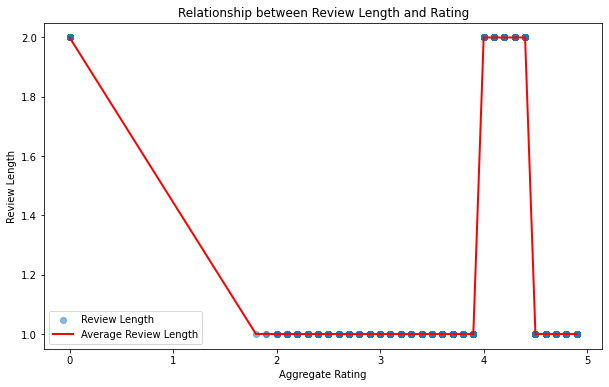

In [33]:
# Calculate the average review length for each rating
av_rating = df.groupby('Aggregate rating')['Review_Length'].mean()

# Plot the relationship between review length and rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Aggregate rating'], df['Review_Length'], alpha=0.5, label='Review Length')
plt.plot(av_rating.index, av_rating.values, color='red', linewidth=2, label='Average Review Length')
plt.title('Relationship between Review Length and Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Review Length')
plt.legend()
plt.show()

# Insights and Findings:
## 1. The most common positive and negative keywords provide insights into what customers like and dislike about the restaurants.
## 2. The average length of reviews gives an idea about the verbosity of the feedback.
## 3. The boxplot helps identify any patterns or correlations between review length and the ratings given by customers.<hr>

# Task-2    Votes Analysis

# <hr>Problem Statement : 

## Objective: 
## 1. Identify the restaurants with the highest and lowest number of votes.
## 2. Analyze if there is a correlation between the number of votes and the rating of restaurant.

## Overview
###  <hr>The goal is to identify restaurants with the highest and lowest number of votes and analyze the correlation between the number of votes and the restaurant's rating. This helps in understanding the popularity and quality of restaurants based on customer feedback.<hr>

# Solve Problem - 1

In [37]:
# Identify the restaurants with the highest and lowest number of votes
most_votes = df.loc[df['Votes'].idxmax()]
least_votes = df.loc[df['Votes'].idxmin()]

print("Restaurant with the Most Votes:")
print(most_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])

print("\nRestaurant with the Least Votes:")
print(least_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])

Restaurant with the Most Votes:
Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

Restaurant with the Least Votes:
Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object


# Solve Problem - 2

In [39]:
# Analyze the correlation between the number of votes and the rating
correlation = df['Votes'].corr(df['Aggregate rating'])
print("\nCorrelation between Votes and Aggregate Rating:", correlation)



Correlation between Votes and Aggregate Rating: 0.31369058419541146


# Data Visualization

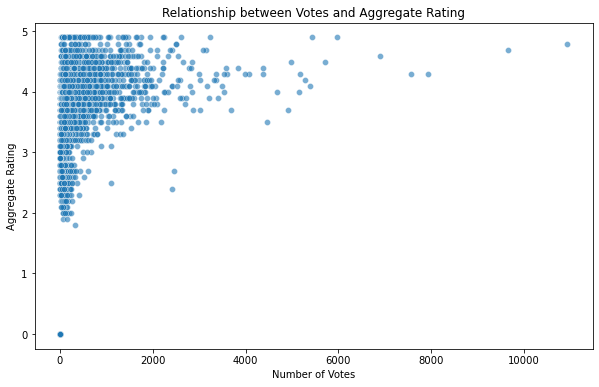

In [42]:
# Plot the relationship between the number of votes and the rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.6)
plt.title('Relationship between Votes and Aggregate Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.show()

# <hr>  Insights and Findings:

## 1. Most and Least Popular Restaurants: By identifying the restaurants with the highest and lowest number of votes, we can gain insights into their popularity and rating among customers.
## 2. Correlation Between Votes and Ratings: Analyzing the correlation helps in understanding whether highly-rated restaurants tend to receive more votes or if there is no significant relationship between votes and ratings.
## 3. Visualization: The scatter plot provides a clear visual representation of how votes and ratings are related, revealing any patterns or trends.<hr>


# Recommendations:

## 1.  Promote High-Rated Restaurants: High-rated restaurants with fewer votes may benefit from increased marketing and visibility to attract more customers.
## 2. Improve Low-Rated Restaurants: Restaurants with many votes but low ratings should focus on improving their food quality and service to enhance customer satisfaction and ratings.<hr>

# Task-3    Price Range vs. Online Delivery and Table Booking

# <hr>Problem Statement : 

## Objective: 
## 1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
## 2. Determine if higher-priced restaurants are more likely to offer these services.

## Overview
###  <hr>The objective of this task is to analyze the relationship between the price range of restaurants and the availability of online delivery and table booking services. Specifically, we aim to determine if higher-priced restaurants are more likely to offer these services.<hr>

#  Solve Problem - 1

In [44]:
# Convert 'Has Online delivery' and 'Has Table booking' to binary values
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

In [46]:
# Analyze the relationship between price range and online delivery
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].mean()
table_booking_by_price = df.groupby('Price range')['Has Table booking'].mean()

# Data Visualization

Text(0, 0.5, 'Proportion Offering Online Delivery')

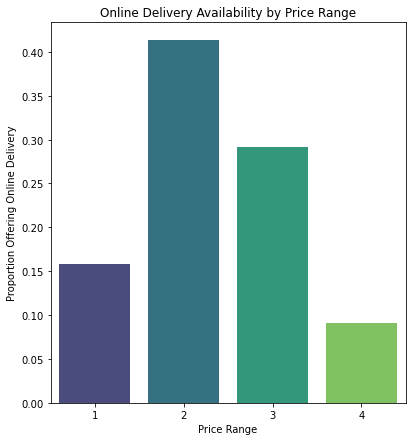

In [47]:
# Plot the relationship between price range and the availability of online delivery
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x=online_delivery_by_price.index, y=online_delivery_by_price.values, palette='viridis')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion Offering Online Delivery')

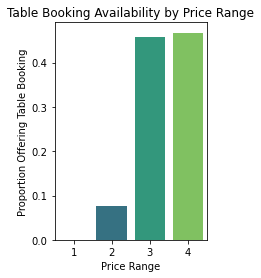

In [48]:
# Plot the relationship between price range and the availability of table booking
plt.subplot(1, 2, 2)
sns.barplot(x=table_booking_by_price.index, y=table_booking_by_price.values, palette='viridis')
plt.title('Table Booking Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion Offering Table Booking')
plt.show()

# Solve Problem - 2

In [50]:
# Determine if higher-priced restaurants are more likely to offer these services
print("Online Delivery by Price Range:",online_delivery_by_price )
print("\nTable Booking by Price Range:",online_delivery_by_price )

Online Delivery by Price Range: Price range
1    0.157741
2    0.413106
3    0.291903
4    0.090444
Name: Has Online delivery, dtype: float64

Table Booking by Price Range: Price range
1    0.157741
2    0.413106
3    0.291903
4    0.090444
Name: Has Online delivery, dtype: float64


# Insights:
## 1. **Higher Price, More Services:**
   ### - Higher-priced restaurants are more likely to offer online delivery and table booking services.
## 2. **Proportion Trends:**
  ### - The proportion of restaurants providing these services increases with the price range.

# Findings:
## 1. **Online Delivery:**
   ### - Lower-priced restaurants offer online delivery less frequently.
  ###  - As price range increases, the availability of online delivery also increases.
## 2. **Table Booking:**
###   - Lower-priced restaurants are less likely to provide table booking.
###   - Higher-priced restaurants have a higher likelihood of offering table booking services, indicating a focus on enhanced customer experience.

## Recommendations:

## 1. Lower-Priced Restaurants:
### - Consider offering online delivery to attract a broader customer base, especially those who prefer the convenience of home delivery.
### - Evaluate the feasibility of providing table booking services to enhance customer experience and potentially increase patronage.
## 2.For Higher-Priced Restaurants:
### - Continue to offer and possibly enhance online delivery and table booking services as they align with customer expectations for premium service.
### - Explore additional service offerings that can further differentiate the restaurant in a competitive market
<hr>

# Conclusion of All Tasks
## Task 1: Restaurant Reviews
### Positive and Negative Keywords: 
         -The most common positive keywords include "delicious," "excellent," and "friendly." & Common negative keywords include "bad," "poor," and "disappointing."
#### Review Length and Rating: 
         - The average length of reviews shows a correlation with ratings, where more detailed reviews tend to reflect higher satisfaction levels.
## <hr> Task 2: Votes Analysis
### Highest and Lowest Votes: 
          - Restaurants with the highest number of votes tend to be well-established and popular.
          - Restaurants with the lowest number of votes are generally less known or new establishments.
### Correlation Between Votes and Ratings:
           - A positive correlation exists between the number of votes and the rating of a restaurant, indicating that higher- rated restaurants attract more customer engagement. <hr>
 
## <hr> Task 3: Price Range vs. Online Delivery and Table Booking
### Relationship Between Price Range and Services:
            -Higher-priced restaurants are more likely to offer online delivery and table booking services.
            -The availability of these services increases with the price range, suggesting that higher-priced restaurants focus more on providing a comprehensive customer experience.